### Lending Club - Part 3 - Data Processing and preparation

Project Goals:
1. At loan origination: is my model able to predict if a customer will fully pay off their debt or will they incur a charge off
2. Multiclassification exercise: the objective of the second part is to get experience with multiclassification.

In this section, we will process our data, use dummy encoding for our categorical features and clean up/feature engineer any parts that we overlooked in the prior section. From this final processed dataset, we will use this same dataset for our training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/lendingclub_preprocessed.csv')

In [3]:
len(df)

2219531

In [4]:
data_info = pd.read_csv('./DATA/Lending Club Data Dictionary Approved.csv',index_col='LoanStatNew', encoding = "ISO-8859-1")

In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219531 entries, 0 to 2219530
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   loan_amnt             float64
 2   funded_amnt_inv       float64
 3   term                  object 
 4   int_rate              float64
 5   installment           float64
 6   sub_grade             object 
 7   home_ownership        object 
 8   annual_inc            float64
 9   verification_status   object 
 10  loan_status           object 
 11  purpose               object 
 12  zip_code              object 
 13  addr_state            object 
 14  dti                   float64
 15  delinq_2yrs           float64
 16  fico_range_high       float64
 17  open_acc              float64
 18  pub_rec               float64
 19  revol_bal             float64
 20  revol_util            float64
 21  total_acc             float64
 22  initial_list_status   object 
 23  total_p

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year'],
      dtype='object')

In [9]:
def list_feat():
    for i in (df.columns[:-2]):
        print(f"{i} : {data_info.loc[i]['Description']}")
    print(f"label : Created labels using loan_status for data exploration")
    print(f"year : The year the customer's credit line was first open")

In [10]:
list_feat()

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt_inv : The total amount committed by investors for that loan at that point in time.
term : The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
sub_grade : LC assigned loan subgrade
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified
loan_status : Current status of the loan
purpose : A category provided by the borrower for the loan req

In [11]:
g = df.columns.to_series().groupby(df.dtypes).groups

In [12]:
g

{int64: ['label', 'year'], float64: ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'last_fico_range_high', 'mort_acc', 'pub_rec_bankruptcies'], object: ['term', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']}

In [13]:
df.select_dtypes('object').columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

Let's go through the terms to see if we need to do any feature engineering

In [14]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Let's map this to a numeric value

In [15]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})

we already worked on subgrade in part2, let's retrieves the dummies for it

In [16]:
pd.get_dummies(df['sub_grade'], drop_first=True)

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219526,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2219527,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2219528,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2219529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1).drop('sub_grade', axis=1).columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt',
       'last_fico_range_high', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'label', 'year', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [18]:
df = pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1).drop('sub_grade', axis=1)

In [19]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'loan_status', 'purpose',
       'zip_code', 'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [20]:
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [21]:
df['home_ownership'].value_counts()

MORTGAGE    1092719
RENT         877397
OWN          248257
ANY             970
OTHER           142
NONE             46
Name: home_ownership, dtype: int64

In [22]:
df['home_ownership'] = df['home_ownership'].replace('ANY', 'OTHER').replace('NONE', 'OTHER')

In [23]:
pd.get_dummies(df['home_ownership'], drop_first=True)

,OTHER,OWN,RENT
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2219526,0,0,0
2219527,0,0,0
2219528,0,0,0
2219529,0,0,1


In [24]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1).drop(['home_ownership'], axis=1)

In [25]:
df.select_dtypes('object').columns

Index(['verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [26]:
df['verification_status'].value_counts()

Source Verified    870745
Not Verified       731225
Verified           617561
Name: verification_status, dtype: int64

In [27]:
df['purpose'].value_counts()

debt_consolidation    1254774
credit_card            509511
home_improvement       147519
other                  136014
major_purchase          49324
medical                 26888
small_business          23909
car                     23586
vacation                15238
moving                  15006
house                   13757
wedding                  2278
renewable_energy         1421
educational               306
Name: purpose, dtype: int64

In [28]:
df['initial_list_status'].value_counts()

w    1506010
f     713521
Name: initial_list_status, dtype: int64

In [29]:
df['application_type'].value_counts()

Individual    2104514
Joint App      115017
Name: application_type, dtype: int64

In [30]:
df = pd.concat([df, pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)], axis=1).drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [31]:
df.select_dtypes('object').columns

Index(['loan_status', 'zip_code', 'addr_state'], dtype='object')

In [32]:
len(df['zip_code'].unique())

955

In [33]:
df['zip_code']

0          190xx
1          577xx
2          605xx
3          076xx
4          174xx
           ...  
2219526    356xx
2219527    840xx
2219528    907xx
2219529    334xx
2219530    770xx
Name: zip_code, Length: 2219531, dtype: object

Technically, we could grab the first 3 digits of the zip code.

First 3 digits of the zipcode meaning:
Source: https://www.arcgis.com/home/item.html?id=2690036a601b4e9a937466884a594938
The first digit of a five-digit ZIP Code divides the United States into 10 large groups of states numbered from 0 in the Northeast to 9 in the far West. Within these areas, each state is divided into an average of 10 smaller geographical areas, identified by the second and third digits. These digits, in conjunction with the first digit, represent a sectional center facility or a mail processing facility area.

However, if we do that we would have 955 unique 3 digit zip codes and we would have to create 954 dummy variables. Due to hardware constraints and computational cost, we will opt to drop this column instead of using it as a feature in our models.

In [34]:
df = df.drop('zip_code', axis=1)

In [35]:
df['addr_state'].unique()

array(['PA', 'SD', 'IL', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA',
       'VA', 'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH',
       'LA', 'FL', 'CO', 'MI', 'TN', 'DC', 'MA', 'WI', 'HI', 'VT', 'DE',
       'NH', 'NE', 'CT', 'OR', 'AR', 'MT', 'NV', 'WV', 'WY', 'OK', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK', 'ID', 'IA'], dtype=object)

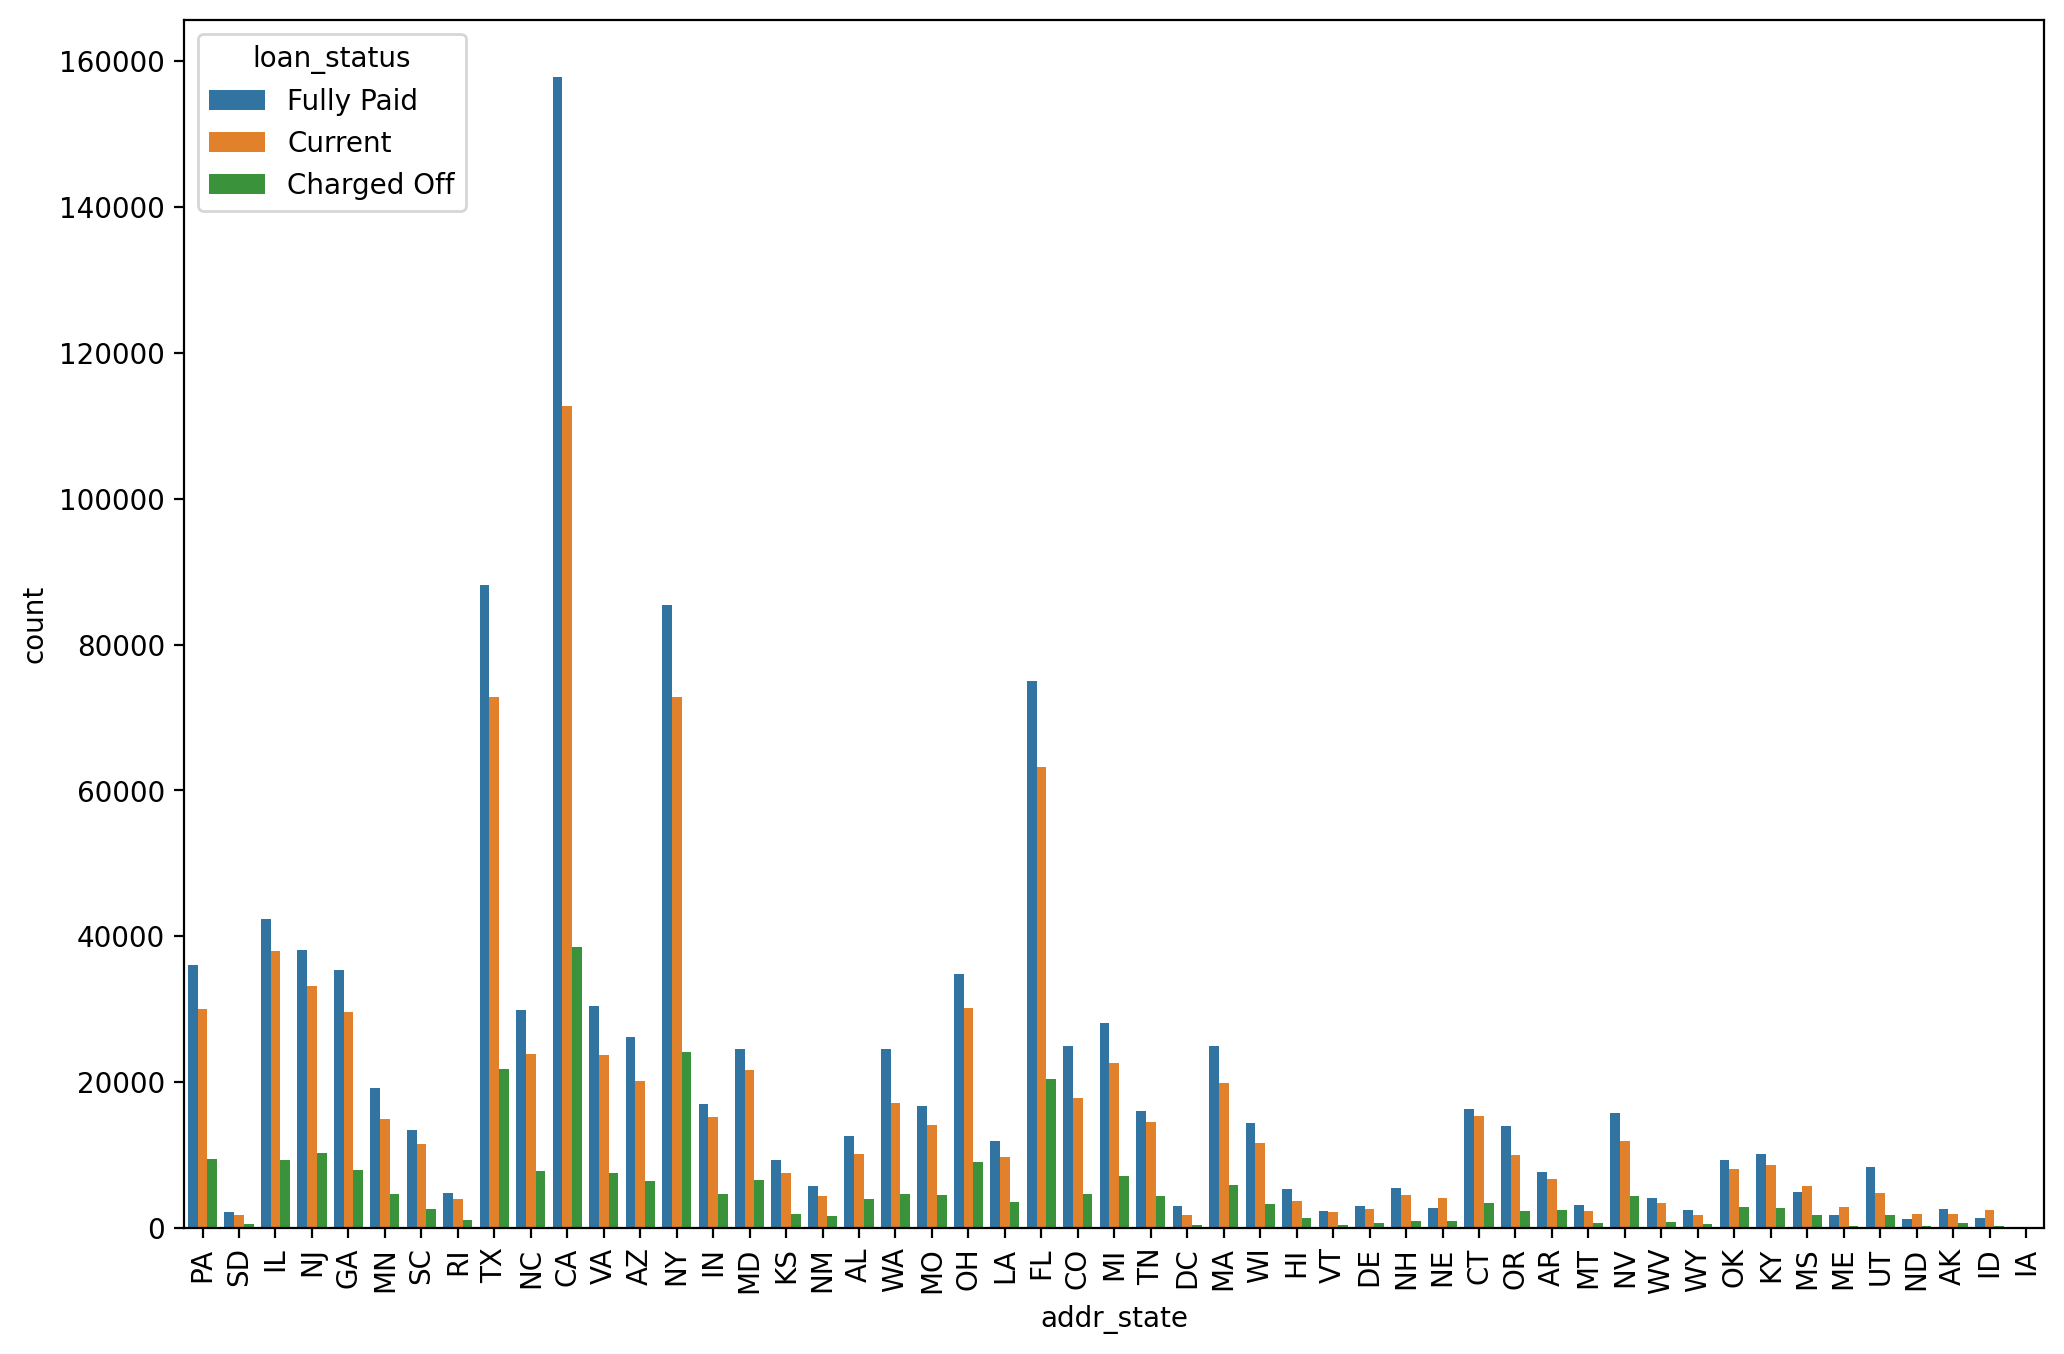

In [36]:
plt.figure(figsize=(12,8), dpi=200)
sns.countplot(data=df, x='addr_state', hue='loan_status')
plt.xticks(rotation=90);

In [37]:
df = pd.concat([df, pd.get_dummies(df['addr_state'], drop_first=True)], axis=1).drop(['addr_state'], axis=1)

In [38]:
df

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_high,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,3600.0,3600.0,36,13.99,123.03,55000.0,Fully Paid,5.91,0.0,679.0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,24700.0,36,11.99,820.28,65000.0,Fully Paid,16.06,1.0,719.0,...,1,0,0,0,0,0,0,0,0,0
2,20000.0,20000.0,60,10.78,432.66,63000.0,Fully Paid,10.78,0.0,699.0,...,0,0,0,0,0,0,0,0,0,0
3,35000.0,35000.0,60,14.85,829.90,110000.0,Current,17.06,0.0,789.0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,10400.0,60,22.45,289.91,104433.0,Fully Paid,25.37,1.0,699.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219526,24000.0,24000.0,60,12.79,543.50,95000.0,Current,19.61,0.0,669.0,...,0,0,0,0,0,0,0,0,0,0
2219527,24000.0,24000.0,60,10.49,515.74,108000.0,Current,34.94,0.0,699.0,...,0,0,0,1,0,0,0,0,0,0
2219528,40000.0,40000.0,60,10.49,859.56,227000.0,Current,12.75,7.0,709.0,...,0,0,0,0,0,0,0,0,0,0
2219529,24000.0,24000.0,60,14.49,564.56,110000.0,Charged Off,18.30,0.0,664.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'fico_range_high',
       ...
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', length=125)

The label column was mapped from loan_status column to allow us to calculate correlation functions and do feature analysis. Let's drop the label column. We will recreate the label column for our specific project needs

In [40]:
df = df.drop('label', axis=1)

In [41]:
len(df.columns)

124

In [42]:
df.to_csv('./DATA/lendingclub_processed.csv')